In [51]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [52]:
civs_path = 'images'

In [53]:
path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

80


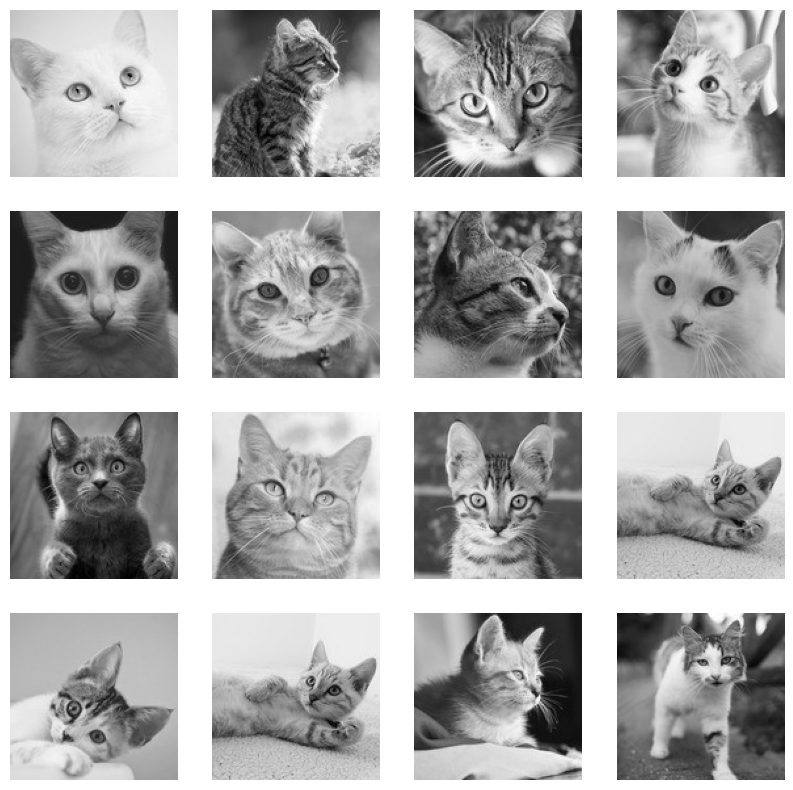

In [54]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [55]:
def label_func2(fname):
    ## print(fname)
    fname = fname.replace("images","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
                              
    y1 = float(temp_name[1].replace("FPat", ""))     ## 'FPat1'
    y2 = float(temp_name[2].replace("Age", ""))    ## 'Age5'
    y3 = float(temp_name[3].replace("ESze", ""))     ## 'ESze2'
    y4 = float(temp_name[4].replace("NSze", ""))     ## 'NSze1'
    y5 = float(temp_name[5].replace("FThck", ""))     ## 'FThck1'
 
    
 
    ## np.array([y1, y2, y3, y4, y5])
    return [fname, y1, y2, y3, y4, y5]

In [56]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ## print(img_name)
    
    my_img = Image.open(img_name)
    
    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    
        ## print(img_np.shape)
    list_imgs.append(img_np)

    list_label_vectors.append( temp_label_vector_rc )

In [58]:
X = list_imgs
y =  list_label_vectors 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

64
16
64
16


In [60]:
X_train[0]

array([[[131, 131, 131],
        [143, 143, 143],
        [151, 151, 151],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [110, 110, 110]],

       [[128, 128, 128],
        [141, 141, 141],
        [152, 152, 152],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [109, 109, 109]],

       [[126, 126, 126],
        [137, 137, 137],
        [146, 146, 146],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       ...,

       [[ 27,  27,  27],
        [ 17,  17,  17],
        [ 34,  34,  34],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [ 17,  17,  17]],

       [[ 21,  21,  21],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 12,  12,  12],
        [ 18,  18,  18],
        [ 22,  22,  22]],

       [[ 21,  21,  21],
        [ 40,  40,  40],
        [ 15,  15,  15],
        ...,
        [ 14,  14,  14],
        [ 17,  17,  17],
        [ 14,  14,  14]]

In [62]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

In [63]:
list_imgs_train[0]

array([[[131, 131, 131],
        [143, 143, 143],
        [151, 151, 151],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [110, 110, 110]],

       [[128, 128, 128],
        [141, 141, 141],
        [152, 152, 152],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [109, 109, 109]],

       [[126, 126, 126],
        [137, 137, 137],
        [146, 146, 146],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       ...,

       [[ 27,  27,  27],
        [ 17,  17,  17],
        [ 34,  34,  34],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [ 17,  17,  17]],

       [[ 21,  21,  21],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 12,  12,  12],
        [ 18,  18,  18],
        [ 22,  22,  22]],

       [[ 21,  21,  21],
        [ 40,  40,  40],
        [ 15,  15,  15],
        ...,
        [ 14,  14,  14],
        [ 17,  17,  17],
        [ 14,  14,  14]]

In [64]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [65]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [66]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(64, 10)
(16, 10)


In [67]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [68]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [69]:
list_imgs_train[17]

array([[[30, 30, 30],
        [30, 30, 30],
        [30, 30, 30],
        ...,
        [45, 45, 45],
        [41, 41, 41],
        [39, 39, 39]],

       [[36, 36, 36],
        [35, 35, 35],
        [34, 34, 34],
        ...,
        [37, 37, 37],
        [36, 36, 36],
        [37, 37, 37]],

       [[38, 38, 38],
        [37, 37, 37],
        [36, 36, 36],
        ...,
        [39, 39, 39],
        [45, 45, 45],
        [52, 52, 52]],

       ...,

       [[76, 76, 76],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [33, 33, 33],
        [51, 51, 51],
        [80, 80, 80]],

       [[71, 71, 71],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [38, 38, 38],
        [54, 54, 54],
        [72, 72, 72]],

       [[66, 66, 66],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [44, 44, 44],
        [56, 56, 56],
        [62, 62, 62]]], dtype=uint8)

In [70]:
list_imgs_train[17].shape

(128, 128, 3)

In [71]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [72]:
list_imgs_train_stretched[0]

array([131, 131, 131, ...,  14,  14,  14], dtype=uint8)

In [73]:
list_imgs_train_stretched[4].shape

(49152,)

In [74]:
list_imgs_train_stretched[4][:1000]

array([217, 217, 217, 220, 220, 220, 224, 224, 224, 225, 225, 225, 226,
       226, 226, 228, 228, 228, 229, 229, 229, 228, 228, 228, 230, 230,
       230, 230, 230, 230, 230, 230, 230, 231, 231, 231, 231, 231, 231,
       230, 230, 230, 230, 230, 230, 230, 230, 230, 227, 227, 227, 230,
       230, 230, 234, 234, 234, 232, 232, 232, 227, 227, 227, 227, 227,
       227, 228, 228, 228, 223, 223, 223, 228, 228, 228, 225, 225, 225,
       223, 223, 223, 219, 219, 219, 224, 224, 224, 227, 227, 227, 224,
       224, 224, 230, 230, 230, 230, 230, 230, 228, 228, 228, 226, 226,
       226, 226, 226, 226, 224, 224, 224, 220, 220, 220, 216, 216, 216,
       213, 213, 213, 213, 213, 213, 212, 212, 212, 211, 211, 211, 211,
       211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211, 211,
       211, 211, 211, 211, 212, 212, 212, 214, 214, 214, 216, 216, 216,
       215, 215, 215, 214, 214, 214, 217, 217, 217, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 223, 223, 223, 225, 225, 225, 22

In [75]:
list_imgs_train_stretched[7].shape

(49152,)

In [76]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (64,) + inhomogeneous part.